# Pharmaceutical Sales prediction

## Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
import seaborn as sns
import plotly.io as pio
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
colors = ['#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF',
          '#FECB52', '#636EFA', '#EF553B', '#00CC96', '#AB63FA', ]

In [8]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from vis_plotly import VisPlotly
from vis_seaborn import VisSeaborn

In [9]:
file_handler = FileHandler()
sn = VisSeaborn()

## Preprocessing

We have already cleaned the data and removed outliers in preprocessing notebook. Then we had also seen which features influence sales in the exploratory section. Now we are now familiar with the data, the final part is selecting the main features and preparing them for training. I have created a script called `create_features.py` for merging both training and test data with the store data.  Then it creates the main features for training and stores them in the features folder. Let's look into the data to see which features are selected.

In [10]:
train_features = file_handler.read_csv("../features/train_features.csv")
test_features = file_handler.read_csv("../features/test_features.csv")
train_sales = file_handler.read_csv("../features/train_sales.csv")
train_customers = file_handler.read_csv("../features/train_customers.csv")

2021-08-02 00:05:59,420 — DfHelper — DEBUG — file read as csv
2021-08-02 00:05:59,625 — DfHelper — DEBUG — file read as csv
2021-08-02 00:05:59,823 — DfHelper — DEBUG — file read as csv
2021-08-02 00:06:00,021 — DfHelper — DEBUG — file read as csv


In [11]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DayOfWeek                  844392 non-null  int64  
 1   Promo                      844392 non-null  int64  
 2   StateHoliday               844392 non-null  int64  
 3   SchoolHoliday              844392 non-null  int64  
 4   StoreType                  844392 non-null  int64  
 5   Assortment                 844392 non-null  int64  
 6   CompetitionDistance        844392 non-null  int64  
 7   Promo2                     844392 non-null  int64  
 8   PromoInterval0             844392 non-null  int64  
 9   PromoInterval1             844392 non-null  int64  
 10  PromoInterval2             844392 non-null  int64  
 11  PromoInterval3             844392 non-null  int64  
 12  days_before_state_holiday  844392 non-null  int64  
 13  days_after_state_holiday   84

In [12]:
feature_columns = [x for x in train_features]

These are the main features selected for prediction based on data exploration.

## Loss function

## LGBM Regressor

In [13]:
model = file_handler.read_model("LGBMRegressor-sales-2021-08-01-19:57")
model


2021-08-02 00:06:07,498 — DfHelper — DEBUG — model read as pkl


LGBMRegressor()

In [13]:
feat_imp = pd.DataFrame({'Feature': feature_columns, 'Feature Importance': model.feature_importances_})
feat_imp = feat_imp.set_index('Feature')
feat_imp = feat_imp.sort_values(by=['Feature Importance'], ascending=False)
feat_imp

,Feature Importance
Feature,
CompetitionDistance,1163
StoreType,243
CompetitionOpen,214
Day,179
DayOfWeek,168
Promo2Open,166
Assortment,166
PromoInterval0,139
Promo2,120


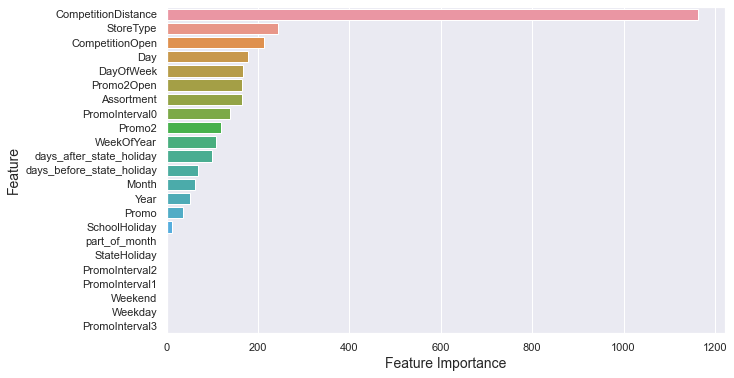

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Feature Importance", y=feat_imp.index, data=feat_imp)
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Feature Importance', fontsize=14)
plt.show()


In [14]:
y_preds = model.predict(train_features) 
prediction_df = train_features.copy()
prediction_df["y_true"] = train_sales
prediction_df["y_pred"] = y_preds 
prediction_df[["y_true", "y_pred"]].head() 

,y_true,y_pred
0,3821,7622.53
1,10765,7622.53
2,8498,7622.53
3,3113,7156.29
4,14049,6120.83


<AxesSubplot:xlabel='Day', ylabel='y_true'>

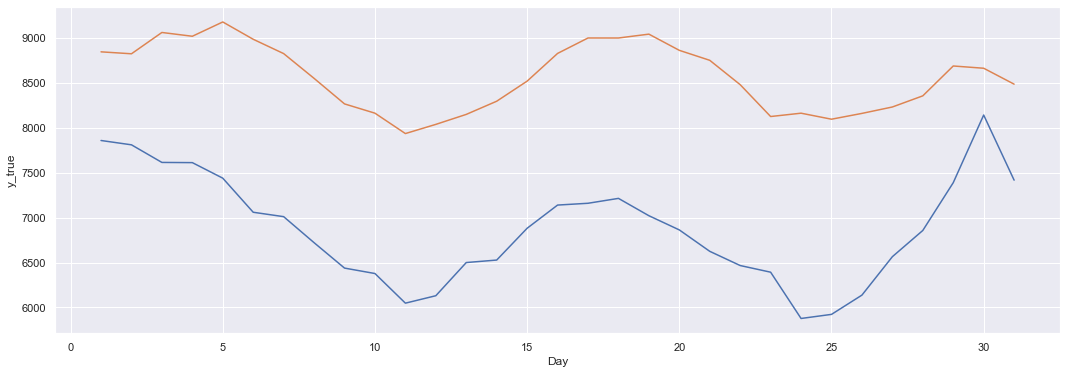

In [15]:
daily_trend = prediction_df.groupby(['Day']).agg({'y_true': 'mean', 'y_pred': 'mean'})
plt.figure(figsize=(18, 6))
sns.lineplot(x=daily_trend.index, y=daily_trend["y_true"])
sns.lineplot(x=daily_trend.index, y=daily_trend["y_pred"])

## Random Forest Regressor

In [21]:
model = file_handler.read_model("RandomForestRegressor-sales-2021-08-01-20:17")
model

2021-08-02 00:08:56,869 — DfHelper — DEBUG — model read as pkl


RandomForestRegressor(max_depth=16, n_estimators=200, verbose=True)

In [22]:
feat_imp = pd.DataFrame({'Feature': feature_columns, 'Feature Importance': model.feature_importances_})
feat_imp = feat_imp.set_index('Feature')
feat_imp = feat_imp.sort_values(by=['Feature Importance'], ascending=False)
feat_imp

,Feature Importance
Feature,
CompetitionDistance,0.33
Promo,0.23
DayOfWeek,0.07
Promo2Open,0.07
CompetitionOpen,0.06
StoreType,0.06
Assortment,0.03
WeekOfYear,0.03
Day,0.02


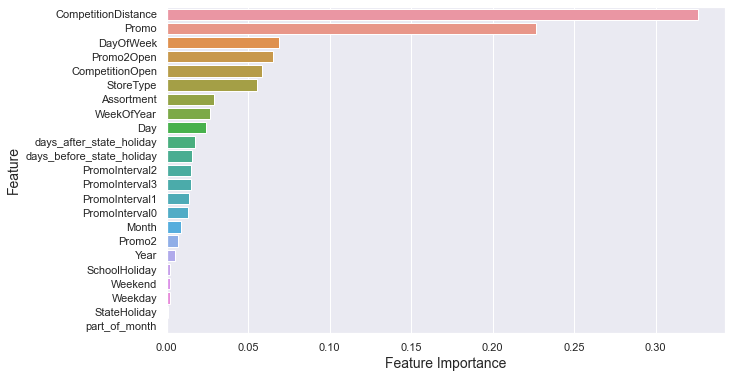

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Feature Importance", y=feat_imp.index, data=feat_imp)
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Feature Importance', fontsize=14)
plt.show()


In [25]:
y_preds = model.predict(train_features)
prediction_df = train_features.copy()
prediction_df["y_true"] = train_sales
prediction_df["y_pred"] = y_preds
prediction_df[["y_true", "y_pred"]].head()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.4s finished


,y_true,y_pred
0,3821,8808.89
1,10765,8808.89
2,8498,8808.89
3,3113,8687.97
4,14049,7266.64


<AxesSubplot:xlabel='Day', ylabel='y_true'>

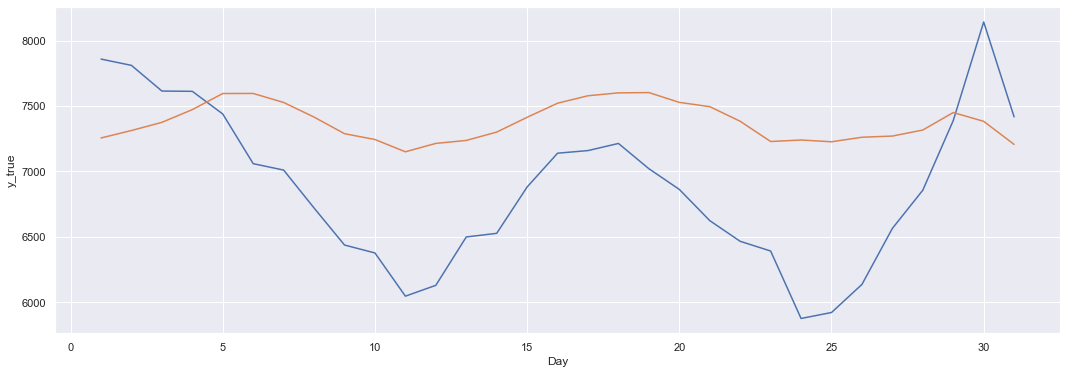

In [26]:
daily_trend = prediction_df.groupby(['Day']).agg({'y_true': 'mean', 'y_pred': 'mean'})
plt.figure(figsize=(18, 6))
sns.lineplot(x=daily_trend.index, y=daily_trend["y_true"])
sns.lineplot(x=daily_trend.index, y=daily_trend["y_pred"])

## XGBOOST Regressor

In [27]:
model = file_handler.read_model("XGBRegressor-sales-2021-08-01-21:03")
model

2021-08-02 00:11:05,530 — DfHelper — DEBUG — model read as pkl


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.02, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0199999996, max_delta_step=0, max_depth=16,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, nthread=-1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [28]:
feat_imp = pd.DataFrame({'Feature': feature_columns, 'Feature Importance': model.feature_importances_})
feat_imp = feat_imp.set_index('Feature')
feat_imp = feat_imp.sort_values(by=['Feature Importance'], ascending=False)
feat_imp

,Feature Importance
Feature,
Promo,0.99
Assortment,0.00
PromoInterval2,0.00
Weekday,0.00
CompetitionDistance,0.00
DayOfWeek,0.00
Weekend,0.00
StoreType,0.00
WeekOfYear,0.00


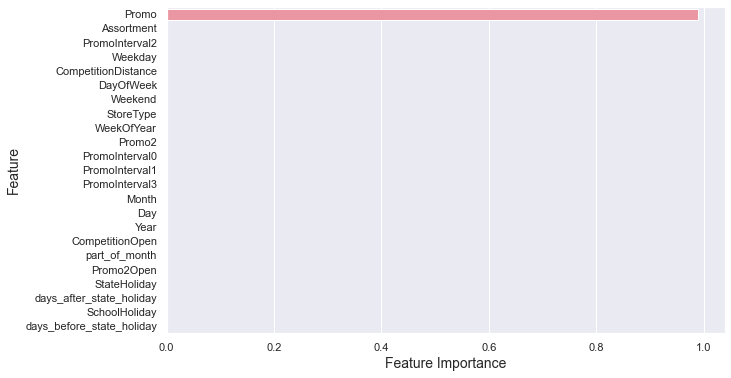

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Feature Importance", y=feat_imp.index, data=feat_imp)
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Feature Importance', fontsize=14)
plt.show()

In [31]:
y_preds = model.predict(train_features)
prediction_df = train_features.copy()
prediction_df["y_true"] = train_sales
prediction_df["y_pred"] = y_preds
prediction_df[["y_true", "y_pred"]].head()


,y_true,y_pred
0,3821,6090.13
1,10765,6090.13
2,8498,6090.13
3,3113,6117.85
4,14049,4943.69


<AxesSubplot:xlabel='Day', ylabel='y_true'>

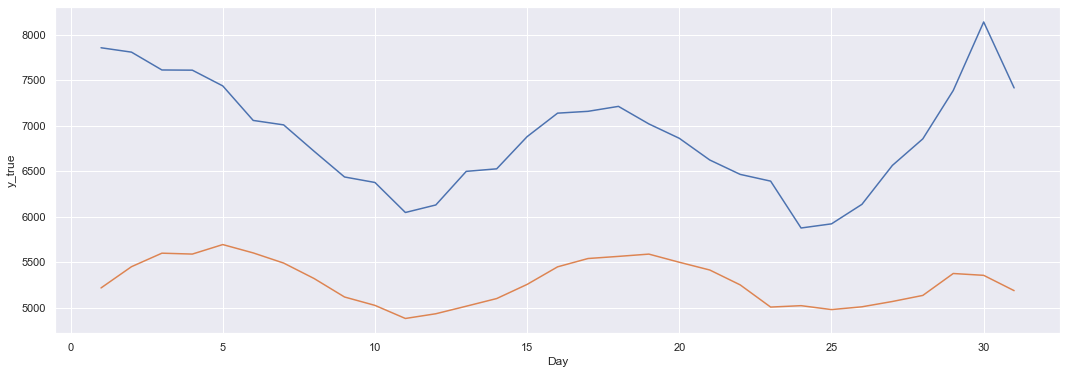

In [32]:
daily_trend = prediction_df.groupby(['Day']).agg({'y_true': 'mean', 'y_pred': 'mean'})
plt.figure(figsize=(18, 6))
sns.lineplot(x=daily_trend.index, y=daily_trend["y_true"])
sns.lineplot(x=daily_trend.index, y=daily_trend["y_pred"])

## Time Series Model

In [11]:
model = tf.keras.models.load_model("../models/TimeSeriesModel-Customers-2021-08-01-12:43.h5")

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, None, 20)          1760      
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                1240      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 3,011
Trainable params: 3,011
Non-trainable params: 0
_________________________________________________________________


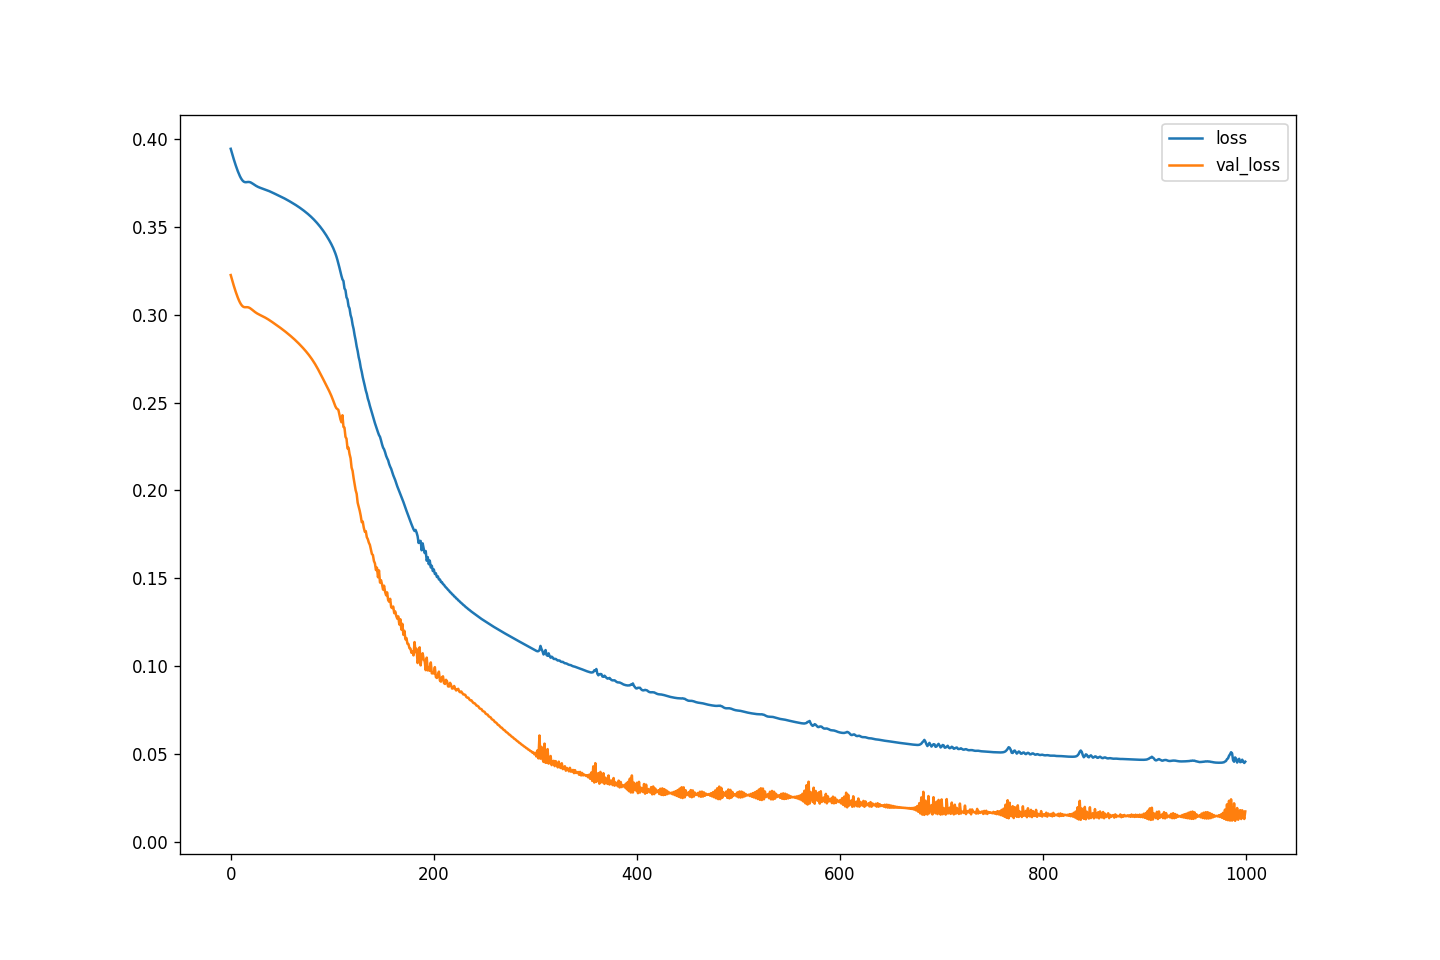

In [44]:
Image("../img/TimeSeriesModel-Customers-2021-08-01-12:43.png")

In [120]:
WINDOW_SIZE = 48
train_df = file_handler.read_csv("../data/train.csv")
train_df["Date"] = train_df.index

2021-08-01 22:38:09,498 — DfHelper — DEBUG — file read as csv


In [66]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(len(series)).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [134]:
sales_data = train_df.groupby("Date").agg({"Sales": "mean"})[:100].copy()

In [135]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(sales_data)
sales_data['DataScaled'] = scaled_array
BATCH_SIZE = len(sales_data) - WINDOW_SIZE * 2

In [136]:
Forecast = model_forecast(model, sales_data.DataScaled.values[:, np.newaxis], WINDOW_SIZE)
Results = Forecast[BATCH_SIZE - WINDOW_SIZE:-1]
Results1 = scaler.inverse_transform(Results.reshape(-1, 1))

In [137]:
prediction_df = sales_data[BATCH_SIZE - WINDOW_SIZE:BATCH_SIZE - WINDOW_SIZE + len(Results1)]
prediction_df["Forecast"] = Results1
prediction_df[["Forecast", "Sales"]]

,Forecast,Sales
Date,,
56,4690.51,11594.00
57,4542.16,8581.00
58,5593.48,7148.00
59,5457.18,9762.00
60,7045.33,5572.00
61,6705.70,7495.00
62,5668.89,11525.00
63,4765.37,13251.00
64,4528.69,7156.00


<AxesSubplot:xlabel='Date', ylabel='Forecast'>

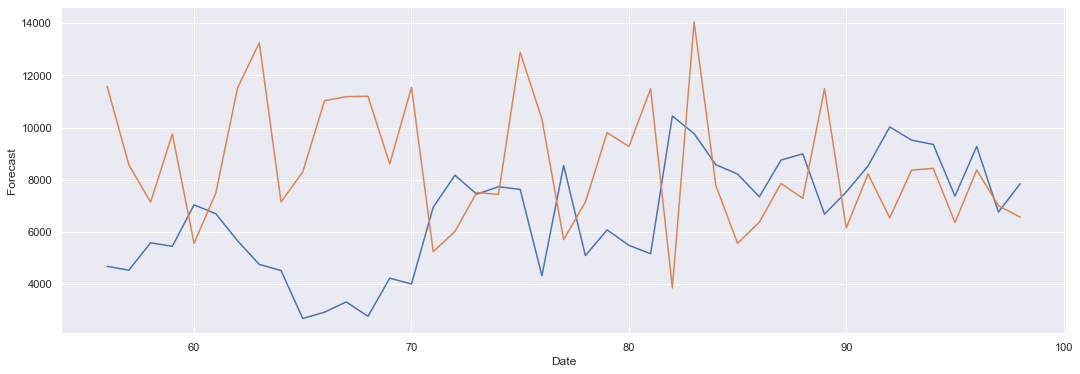

In [138]:
plt.figure(figsize=(18, 6))
sns.lineplot(x=prediction_df.index, y=prediction_df["Forecast"])
sns.lineplot(x=prediction_df.index, y=prediction_df["Sales"])
